In [ ]:
==## data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

## visualization
import seaborn as sns
import matplotlib.pyplot as plt

## machine learning
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#4/0gEZkjsrSvoQeat12rt-gNWKkpVouCnIYnWOZ-jK231kDY38ZNn3eD0
file_id = '1lvBPE20czZcTBL19gpB3Bxd-efjmTaYv'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
downloaded.GetContentFile('data.csv')

In [ ]:
## acquire data
All_data = pd.read_csv('data.csv')
All_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


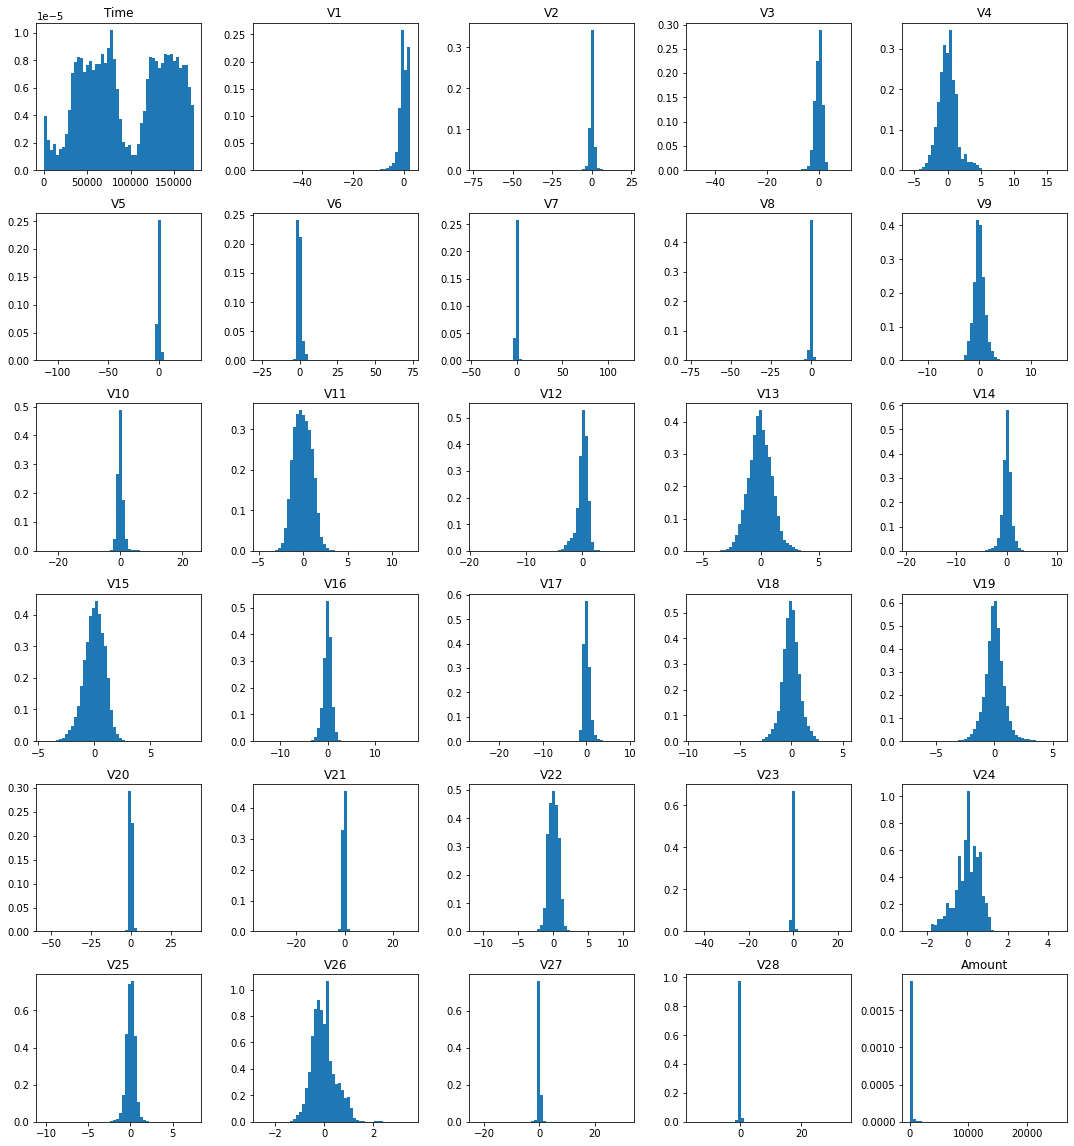

In [ ]:
## go over/check the distribution of all data

fig, ax = plt.subplots(nrows=6, ncols=5, sharex=False, sharey=False)
i=0
for row in ax:
    for col in row:
        feature = All_data.columns[i]
        col.hist(All_data[feature],50,alpha=1, cumulative=0,density=True)
        col.set_title(feature)
        i+=1
fig = plt.gcf()
fig.set_size_inches(15, 16)
fig.tight_layout(pad=1.0)
plt.show()

[[ 1.    0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  0.03 -0.25
   0.12 -0.07 -0.1  -0.18  0.01 -0.07  0.09  0.03 -0.05  0.04  0.14  0.05
  -0.02 -0.23 -0.04 -0.01 -0.01 -0.01]
 [ 0.12  1.   -0.   -0.   -0.    0.    0.    0.   -0.    0.    0.    0.
   0.   -0.    0.   -0.    0.   -0.    0.    0.    0.   -0.    0.    0.
  -0.   -0.   -0.    0.    0.   -0.23]
 [-0.01 -0.    1.    0.   -0.    0.    0.   -0.    0.   -0.   -0.    0.
  -0.   -0.   -0.    0.    0.   -0.    0.    0.    0.    0.    0.    0.
  -0.    0.    0.   -0.   -0.   -0.53]
 [-0.42 -0.    0.    1.   -0.   -0.    0.    0.   -0.    0.    0.    0.
   0.   -0.    0.   -0.    0.    0.    0.    0.    0.   -0.   -0.   -0.
   0.    0.   -0.    0.    0.   -0.21]
 [-0.11 -0.   -0.   -0.    1.   -0.   -0.   -0.    0.    0.   -0.   -0.
  -0.    0.   -0.    0.   -0.   -0.   -0.   -0.   -0.   -0.    0.    0.
   0.    0.   -0.   -0.   -0.    0.1 ]
 [ 0.17  0.    0.   -0.   -0.    1.    0.   -0.    0.    0.    0.    0.
   0.   -

[Text(0, 0, 'Time'),
 Text(0, 0, 'V1'),
 Text(0, 0, 'V2'),
 Text(0, 0, 'V3'),
 Text(0, 0, 'V4'),
 Text(0, 0, 'V5'),
 Text(0, 0, 'V6'),
 Text(0, 0, 'V7'),
 Text(0, 0, 'V8'),
 Text(0, 0, 'V9'),
 Text(0, 0, 'V10'),
 Text(0, 0, 'V11'),
 Text(0, 0, 'V12'),
 Text(0, 0, 'V13'),
 Text(0, 0, 'V14'),
 Text(0, 0, 'V15'),
 Text(0, 0, 'V16'),
 Text(0, 0, 'V17'),
 Text(0, 0, 'V18'),
 Text(0, 0, 'V19'),
 Text(0, 0, 'V20'),
 Text(0, 0, 'V21'),
 Text(0, 0, 'V22'),
 Text(0, 0, 'V23'),
 Text(0, 0, 'V24'),
 Text(0, 0, 'V25'),
 Text(0, 0, 'V26'),
 Text(0, 0, 'V27'),
 Text(0, 0, 'V28'),
 Text(0, 0, 'Amount')]

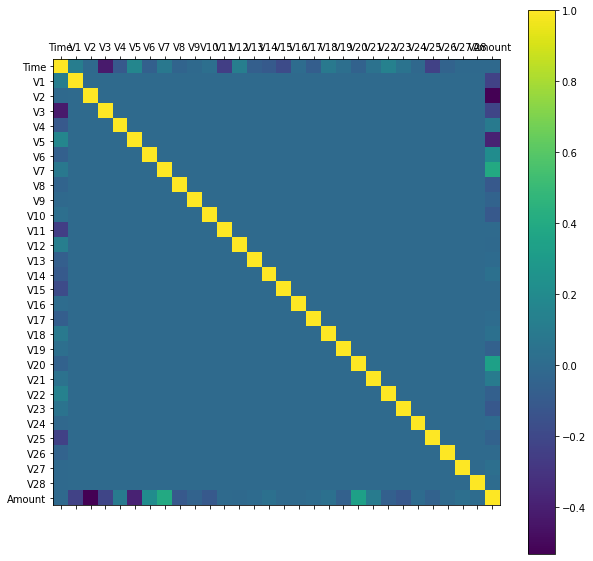

In [ ]:
 ##check correlation analysis to pick features
x = All_data.iloc[:,:-1]
correlation_matrix = np.corrcoef(x, rowvar=False) 
print(correlation_matrix.round(2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
legend=ax.matshow(correlation_matrix)
fig.colorbar(legend)
ticks = np.arange(0, 30, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(All_data.iloc[:,:-1])
ax.set_yticklabels(All_data.iloc[:,:-1])

In [ ]:
## Based on above figure, it looks like there are no duplicate features. All data should be considered.
## Separate input features and target

y = All_data.Class
X = All_data.drop('Class', axis=1)

## split testing and training sets: 75% training data, 15% validation data, 15% test data
X_train, Dx_test, y_train, Dy_test = train_test_split(X, y, test_size=0.3, random_state=20)
X_validation, X_test, y_validation, y_test = train_test_split(Dx_test, Dy_test, test_size=0.5, random_state=20)

In [ ]:
# check imbalance
counts = np.bincount(y_train)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(X_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 356 (0.18% of total)


In [ ]:
#Normalize the features
mean = np.mean(X_train, axis=0)
X_train -= mean
X_validation -= mean
X_test -= mean
std = np.std(X_train, axis=0)
X_train /= std
X_validation /= std
X_test /= std

In [ ]:
## NN model 
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(30,)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
#Train the model with class_weight argument
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(num_thresholds=10, curve='ROC', summation_method='interpolation', name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None)
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=20,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_validation, y_validation),
    class_weight=class_weight,
)


Epoch 1/20
195/195 - 3s - loss: 3.0215e-06 - fn: 42.0000 - fp: 22845.0000 - tn: 176163.0000 - tp: 314.0000 - precision: 0.0136 - recall: 0.8820 - auc: 0.9463 - val_loss: 0.1434 - val_fn: 13.0000 - val_fp: 376.0000 - val_tn: 42273.0000 - val_tp: 59.0000 - val_precision: 0.1356 - val_recall: 0.8194 - val_auc: 0.9535
Epoch 2/20
195/195 - 2s - loss: 2.0385e-06 - fn: 34.0000 - fp: 5633.0000 - tn: 193375.0000 - tp: 322.0000 - precision: 0.0541 - recall: 0.9045 - auc: 0.9635 - val_loss: 0.1971 - val_fn: 9.0000 - val_fp: 1560.0000 - val_tn: 41089.0000 - val_tp: 63.0000 - val_precision: 0.0388 - val_recall: 0.8750 - val_auc: 0.9646
Epoch 3/20
195/195 - 2s - loss: 1.9709e-06 - fn: 32.0000 - fp: 7053.0000 - tn: 191955.0000 - tp: 324.0000 - precision: 0.0439 - recall: 0.9101 - auc: 0.9689 - val_loss: 0.1176 - val_fn: 11.0000 - val_fp: 660.0000 - val_tn: 41989.0000 - val_tp: 61.0000 - val_precision: 0.0846 - val_recall: 0.8472 - val_auc: 0.9685
Epoch 4/20
195/195 - 2s - loss: 4.0137e-06 - fn: 40.00

In [ ]:
NN=model(X_validation)
fp, tp, threshold = roc_curve(y_validation, NN)
auc_NN = auc(fp, tp)

In [ ]:
print(auc_NN)

0.9706852902634163


In [ ]:
## separate minority and majority classes
## concatenate training data back together
X = pd.concat([X_train, y_train], axis=1)
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]
#--------------------------------------------------
# 1. Using upsample minority to deal with imbalance
fraud_upsampled = resample(fraud,
                          replace=True, 
                          n_samples=len(not_fraud), 
                          random_state=20) 

# combine majority and upsampled minority to deal with imbalance
upsampled = pd.concat([not_fraud, fraud_upsampled])
# check new class counts
upsampled.Class.value_counts()

y_upsampled = upsampled.Class
X_upsampled = upsampled.drop('Class', axis=1)

#----------------------------------------------------
# 2. Using downsample majority to deal with imbalance
not_fraud_downsampled = resample(not_fraud,
                                replace = False, 
                                n_samples = len(fraud), 
                                random_state = 20) 

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])
# checking counts
downsampled.Class.value_counts()

y_downsampled = upsampled.Class
X_downsampled = upsampled.drop('Class', axis=1)

#-----------------------------------------------------
# 3. Generate synthetic samples to deal with imbalance
sm = SMOTE(random_state=20, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Logistic Regression
logreg1 = LogisticRegression()
logreg1.fit(X_upsampled, y_upsampled)
y_pred1 = logreg1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred1)
auc_log_upsampled = auc(fp, tp)

logreg2 = LogisticRegression()
logreg2.fit(X_downsampled, y_downsampled)
y_pred2 = logreg2.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred2)
auc_log_downsampled = auc(fp, tp)

logreg3 = LogisticRegression()
logreg3.fit(X_train_sm, y_train_sm)
y_pred3 = logreg3.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred3)
auc_log_sm = auc(fp, tp)

In [ ]:
print(auc_log_upsampled,auc_log_downsampled,auc_log_sm)

0.9463635333380227 0.9463635333380227 0.9243695631785036


In [ ]:
# Decision Tree
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(X_upsampled, y_upsampled)
y_pred1 = decision_tree1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred1)
auc_decision_tree_upsampled = auc(fp, tp)

decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(X_downsampled, y_downsampled)
y_pred2 = decision_tree2.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred2)
auc_decision_tree_downsampled = auc(fp, tp)

decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(X_train_sm, y_train_sm)
y_pred3 = decision_tree3.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred3)
auc_decision_tree_sm = auc(fp, tp)

In [ ]:
print(auc_decision_tree_upsampled,auc_decision_tree_downsampled,auc_decision_tree_sm)

0.867867977886677 0.8609469806508425 0.8601380519538039


In [ ]:
# Random Forest
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X_upsampled, y_upsampled)
y_pred1 = random_forest1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred1)
auc_random_forest_upsampled = auc(fp, tp)

random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_downsampled, y_downsampled)
y_pred2 = random_forest2.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred2)
auc_random_forest_downsampled = auc(fp, tp)

random_forest3 = RandomForestClassifier(n_estimators=100)
random_forest3.fit(X_train_sm, y_train_sm)
y_pred3 = random_forest3.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred3)
auc_random_forest_sm = auc(fp, tp)

In [ ]:
print(auc_random_forest_upsampled,auc_random_forest_downsampled,auc_random_forest_sm)

0.8888419944716692 0.8819092736315297 0.8957512681031989


In [ ]:
# Stochastic Gradient Descent
sgd1 = SGDClassifier()
sgd1.fit(X_upsampled, y_upsampled)
y_pred1 = sgd1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred1)
auc_sgd_upsampled = auc(fp, tp)

sgd2 = SGDClassifier()
sgd2.fit(X_downsampled, y_downsampled)
y_pred2 = sgd2.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred2)
auc_sgd_downsampled = auc(fp, tp)

sgd3 = SGDClassifier()
sgd3.fit(X_train_sm, y_train_sm)
y_pred3 = sgd3.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred3)
auc_sgd_sm = auc(fp, tp)

In [ ]:
print(auc_sgd_upsampled, auc_sgd_downsampled, auc_sgd_sm)

0.9400404399217382 0.9365937002560956 0.930680932990483


In [ ]:
# Gaussian Naive Bayes
gaussian1 = GaussianNB()
gaussian1.fit(X_upsampled, y_upsampled)
y_pred1 = gaussian1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred1)
auc_gnb_upsampled = auc(fp, tp)

gaussian2 = GaussianNB()
gaussian2.fit(X_downsampled, y_downsampled)
y_pred1 = gaussian2.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred2)
auc_gnb_downsampled = auc(fp, tp)

gaussian3 = GaussianNB()
gaussian3.fit(X_train_sm, y_train_sm)
y_pred3 = gaussian1.predict(X_validation)
fp, tp, threshold = roc_curve(y_validation, y_pred3)
auc_gnb_sm = auc(fp, tp)

In [ ]:
print(auc_gnb_upsampled,auc_gnb_downsampled,auc_gnb_sm)

0.903700360305439 0.9365937002560956 0.903700360305439


In [ ]:
 # Model evaluation 
model_evaluation = pd.DataFrame({
    'Model': ['Neural Network',
              'Logistic Regression with upsample', 'Logistic Regression with downsample','Logistic Regression with SMOTE',
              'Decision Tree with umsample','Decision Tree with downsample','Decision Tree with SMOTE',
              'Random Forest with upsample','Random Forest with downsample','Random Forest with SMOTE', 
              'Stochastic Gradient Descent with upsample','Stochastic Gradient Descent with downsample','Stochastic Gradient Descent with SMOTE',
              'Gaussian Naive Bayes with upsample', 'Gaussian Naive Bayes with downsample','Gaussian Naive Bayes with SMOTE'
              ],
    'Score': [ auc_NN, 
              auc_log_upsampled, auc_log_downsampled, auc_log_sm, 
              auc_decision_tree_upsampled, auc_decision_tree_downsampled, auc_decision_tree_sm,
              auc_random_forest_upsampled, auc_random_forest_downsampled, auc_random_forest_sm, 
              auc_sgd_upsampled, auc_sgd_downsampled, auc_sgd_sm, 
              auc_gnb_upsampled, auc_gnb_downsampled, auc_gnb_sm]})
 model_evaluation.sort_values(by='Score', ascending=False)

,Model,Score
0,Neural Network,0.970685
1,Logistic Regression with upsample,0.946364
2,Logistic Regression with downsample,0.946364
10,Stochastic Gradient Descent with upsample,0.940040
11,Stochastic Gradient Descent with downsample,0.936594
14,Gaussian Naive Bayes with downsample,0.936594
12,Stochastic Gradient Descent with SMOTE,0.930681
3,Logistic Regression with SMOTE,0.924370
13,Gaussian Naive Bayes with upsample,0.903700
15,Gaussian Naive Bayes with SMOTE,0.903700
